<font size="+3">Auto-encodeurs</font>

---

L'objectif de ce TP est de manipuler des auto-encodeurs sur un exemple simple : la base de données MNIST. L'idée est de pouvoir visualiser les concepts vus en cours, et notamment d'illustrer la notion d'espace latent.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import random

from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.preprocessing.image import img_to_array
from keras import backend as K

import tensorflow
tensorflow.__version__

2024-10-02 09:37:56.672541: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-10-02 09:37:56.958518: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-10-02 09:37:57.645426: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


'2.16.1'

# Données MNIST

In [2]:
from keras.datasets import mnist

# Chargement et normalisation (entre 0 et 1) des données de la base de données MNIST
(x_train, _), (x_test, _) = mnist.load_data()

Comme vu dans les précédents TPs, la stabilité des algorithmes est améliorée par la normalisation des données.

In [3]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


Le code suivant affiche des exemples d'images.

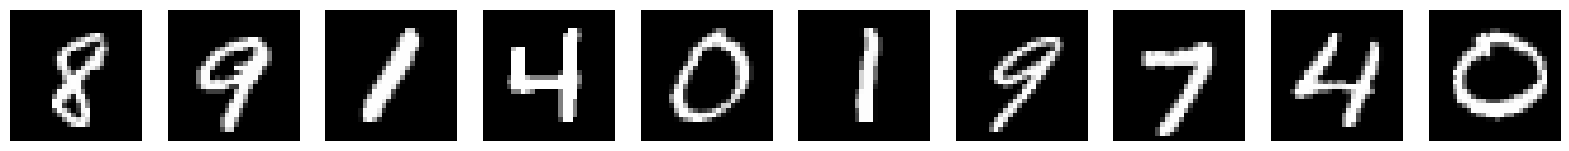

In [11]:
n = 10
idx = [random.randint(0, x_train.shape[0]) for _ in range(0, n)]

plt.figure(figsize=(20, 4))
for i in range(n):
    ax = plt.subplot(2, n, i+1)
    plt.imshow(x_train[idx[i]].reshape(28, 28))
    plt.gray()
    ax.grid(False)
    plt.axis('off')
plt.show()

# Un premier auto-encodeur **très** simple

Nous allons d'abord construire une architecture très simple où :

* L'**encodeur** : est une couche dense composée de 32 neurones (la dimension de la variable latente) avec une fonction d'activation $\texttt{reLu}$ :
$$\texttt{reLu}(x) = max(0,x) \,,$$

* Le **décodeur** : est une couche dense composée de $784=28\times28$ neurones (la dimension d'entrée) avec une fonction d'activation sigmoïde
$$\sigma(x) = \frac{1}{1+\text{e}^x} \,.$$.

On commence par vectoriser les images d'entrées.

In [12]:
# Vectorisation des images d'entrée en vecteurs de dimmension 784
x_train = np.reshape(x_train, (len(x_train), 784))
x_test = np.reshape(x_test, (len(x_test), 784))

print(x_train.shape)
print(x_test.shape)

n_latent = 32
n_input = 784

(60000, 784)
(10000, 784)


**Exercice** : écrire le modèle simple décrit ci-dessus dans `Keras`.

In [18]:
# Couche d'entrée
inputs = Input(shape=(n_input,))

# Encodeur
encoded = Dense(n_latent, activation='relu')(inputs)

# Décodeur
decoded = Dense(n_input, activation='sigmoid')(encoded)

# Création du modèle complet
simple_autoencoder = Model(inputs, decoded)

In [17]:
# %load solutions/simple_autoencoder.py

Nous pouvons à présent entraîner le modèle. Notez que _la variable cible est l'image originale._

In [19]:
simple_autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

simple_autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.3186 - val_loss: 0.1587
Epoch 2/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.1502 - val_loss: 0.1263
Epoch 3/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1233 - val_loss: 0.1121
Epoch 4/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.1106 - val_loss: 0.1036
Epoch 5/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.1034 - val_loss: 0.0985
Epoch 6/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0989 - val_loss: 0.0955
Epoch 7/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0962 - val_loss: 0.0942
Epoch 8/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0951 - val_loss: 0.0935
Epoch 9/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0945 - val_loss: 0.0931
Epoch 10/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0942 - val_loss: 0.0927
Epoch 11/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0939 - val_loss: 0.0926
Epoch 12/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step

**Remarque** : Nous avons utilisé ici l'entropie croisée binaire comme fonction de perte en suivant l'article fondateur [[Kingma & Welling, 2014]](https://arxiv.org/pdf/1312.6114.pdf). Ce choix est ici licite du fait de la fonction d'activation _sigmoïde_.

**Exercice** : Vérifier la performance du modèle en visualisant des exemples d'images de la base de test et de leur reconstruction.

In [21]:
## A COMPLETER ##

def vizualise (x_test,imgs,sz=(28,28)) :
    # sz désigne la taille des images 'imgs' avant reshape pour l'apprentissage
    n = 10
    idx = [random.randint(0, x_test.shape[0]) for _ in range(0, n)]

    plt.figure(figsize=(20, 4))
    for i in range(n):
        # display original
        ax = plt.subplot(2, n, i+1)
        plt.imshow(x_test[idx[i]].reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        # display reconstruction
        ax = plt.subplot(2, n, i+1 + n)
        plt.imshow(imgs[idx[i]].reshape(sz))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.show()

In [22]:
# %load solutions/vizualise.py

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 516us/step


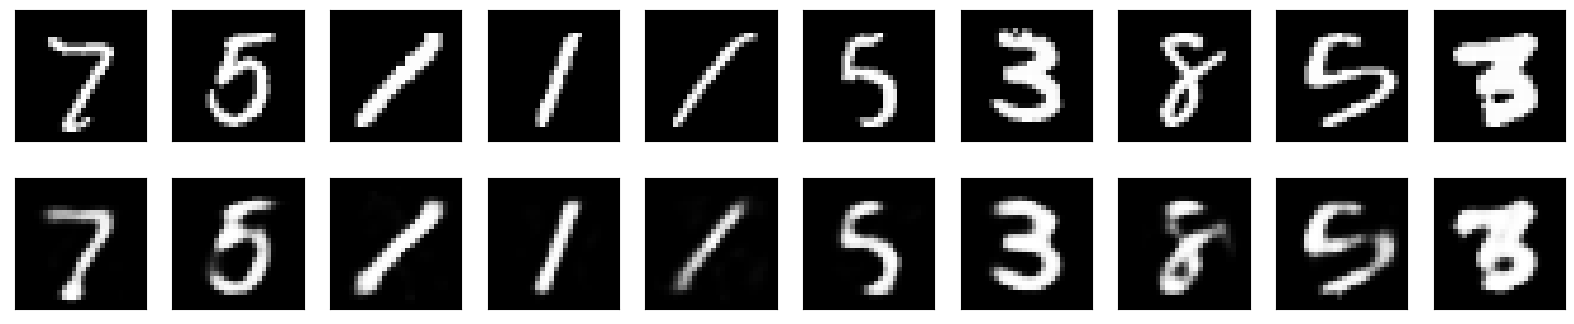

In [23]:
decoded_imgs = simple_autoencoder.predict(x_test)
vizualise (x_test,decoded_imgs)

# Un auto-encodeur plus réaliste

Afin de pouvoir accéder facilement à l'espace latent, on préfère généralement définir trois modèle distinct : un encodeur, un décodeur et l'auto-encodeur comme concaténation des deux.

Le code ci-après permet cette décomposition. On au profite pour complexifier _légèrement_ l'architecture. 

In [24]:
n_latent = 32
n_input = 784

In [25]:
# Dimension de l'entrée
input_img = Input(shape=(n_input,))

# Définition de l'encoder
x = Dense(128, activation='relu')(input_img)
encoded = Dense(n_latent, activation='linear')(x)
encoder = Model(input_img, encoded, name = "encoder")

# Définition du decoder
decoder_input = Input(shape=(n_latent,))
x = Dense(128, activation='relu')(decoder_input)
decoded = Dense(784, activation='linear')(x)
decoder = Model(decoder_input, decoded, name = "decoder")

# Construction de l'auto-encodeur
encoded = encoder(input_img)
decoded = decoder(encoded)
autoencoder = Model(input_img, decoded, name = "autoencoder")

print(autoencoder.summary())
print(" ")
print(encoder.summary())
print(" ")
print(decoder.summary())

Model: "autoencoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ encoder (Functional)            │ (None, 32)             │       104,608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ decoder (Functional)            │ (None, 784)            │       105,360 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 209,968 (820.19 KB)

 Trainable params: 209,968 (820.19 KB)

 Non-trainable params: 0 (0.00 B)

None
 


Model: "encoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 32)             │         4,128 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 104,608 (408.62 KB)

 Trainable params: 104,608 (408.62 KB)

 Non-trainable params: 0 (0.00 B)

None
 


Model: "decoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)      │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │         4,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 784)            │       101,136 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 105,360 (411.56 KB)

 Trainable params: 105,360 (411.56 KB)

 Non-trainable params: 0 (0.00 B)

None


In [26]:
autoencoder.compile(optimizer='Adam', loss='mse')

autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0475 - val_loss: 0.0186
Epoch 2/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0182 - val_loss: 0.0165
Epoch 3/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0167 - val_loss: 0.0159
Epoch 4/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0161 - val_loss: 0.0153
Epoch 5/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0156 - val_loss: 0.0149
Epoch 6/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0152 - val_loss: 0.0145
Epoch 7/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0148 - val_loss: 0.0141
Epoch 8/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0144 - val_loss: 0.0138
Epoch 9/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0141 - val_loss: 0.0136
Epoch 10/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0139 - val_loss: 0.0134
Epoch 11/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0137 - val_loss: 0.0132
Epoch 12/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 749us/step


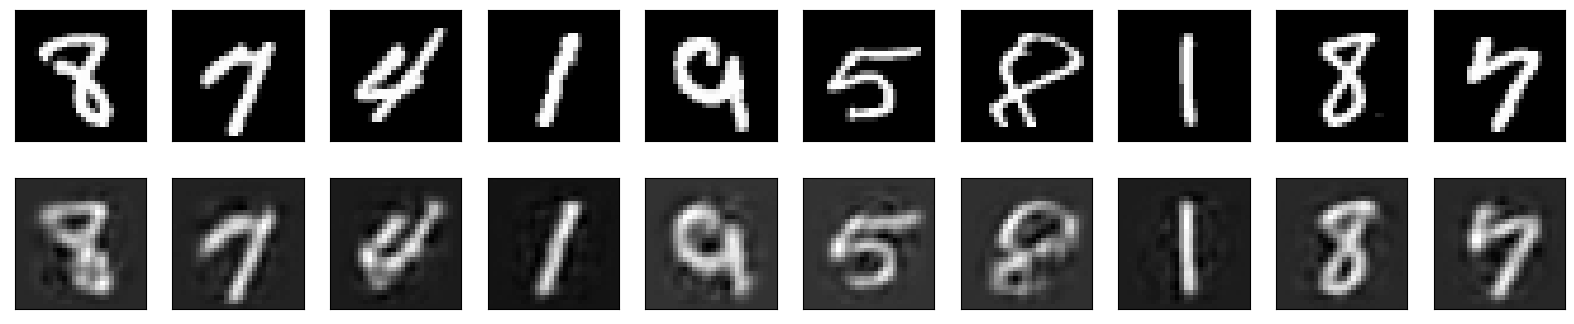

In [27]:
decoded_imgs = autoencoder.predict(x_test)
vizualise(x_test,decoded_imgs)

**Exercice** : Alors qu'on a complexifié le modèle, on obtient des résultats moins probants. À votre avis, à quoi cela peut-il être dû ? 
En vous aidant du premier modèle proposé, proposez une amélioration permettant d'obtenir de meilleurs résultats.
On utilise pas la bonne fonction d'activation pour un problème de classification ?

In [29]:
def build_autoencoder(n_latent = 32):
    # n_latent = dimension de l'espace latent
    # Dimension de l'entrée
    input_img = Input(shape=(n_input,))

    # Définition de l'encoder
    x = Dense(128, activation='relu')(input_img)
    encoded = Dense(n_latent, activation='linear')(x)
    encoder = Model(input_img, encoded, name = "encoder")

    # Définition du decoder
    decoder_input = Input(shape=(n_latent,))
    x = Dense(128, activation='relu')(decoder_input)
    decoded = Dense(784, activation='sigmoid')(x)
    decoder = Model(decoder_input, decoded, name = "decoder")

    # Construction de l'auto-encodeur
    encoded = encoder(input_img)
    decoded = decoder(encoded)
    autoencoder = Model(input_img, decoded, name = "autoencoder")

    return autoencoder, encoder, decoder

In [30]:
# %load solutions/build_autoencoder.py

In [31]:
autoencoder, encoder, decoder = build_autoencoder(n_latent)
autoencoder.compile(optimizer='Adam', loss='binary_crossentropy')

autoencoder.fit(x_train, x_train,
  epochs=50,
  batch_size=128,
  shuffle=True,
  validation_data=(x_test, x_test))

Epoch 1/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.2642 - val_loss: 0.1193
Epoch 2/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.1158 - val_loss: 0.1030
Epoch 3/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.1026 - val_loss: 0.0965
Epoch 4/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0966 - val_loss: 0.0922
Epoch 5/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0926 - val_loss: 0.0894
Epoch 6/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0900 - val_loss: 0.0875
Epoch 7/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0881 - val_loss: 0.0863
Epoch 8/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0868 - val_loss: 0.0854
Epoch 9/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0860 - val_loss: 0.0843
Epoch 10/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0851 - val_loss: 0.0840
Epoch 11/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0842 - val_loss: 0.0832
Epoch 12/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 531us/step


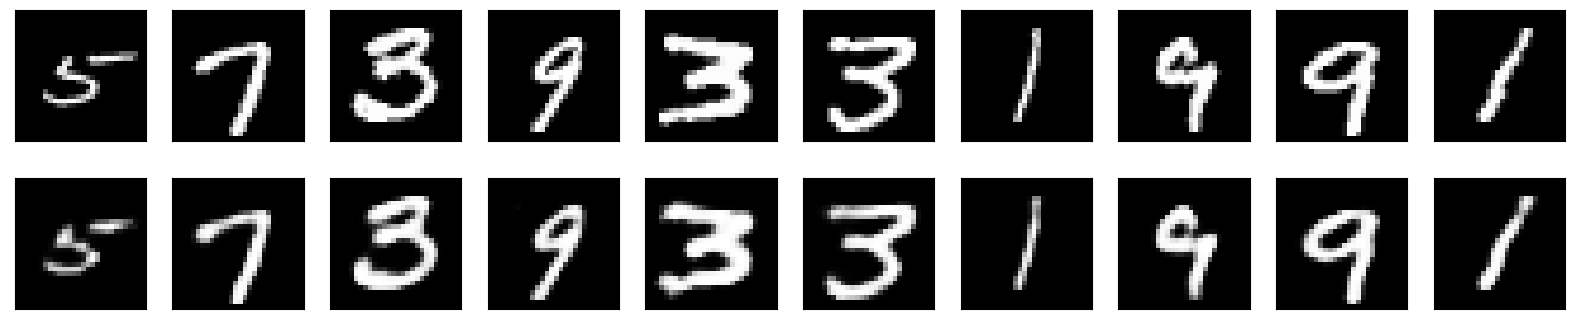

In [32]:
decoded_imgs = autoencoder.predict(x_test)
vizualise(x_test,decoded_imgs)

**Remarque** : La décomposition encodeur/décodeur dans la définition de l'auto-encodeur permet de visualiser facilement l'espace latent.

In [33]:
encoded_imgs = encoder.predict(x_test)
encoded_imgs.shape

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 571us/step


(10000, 32)

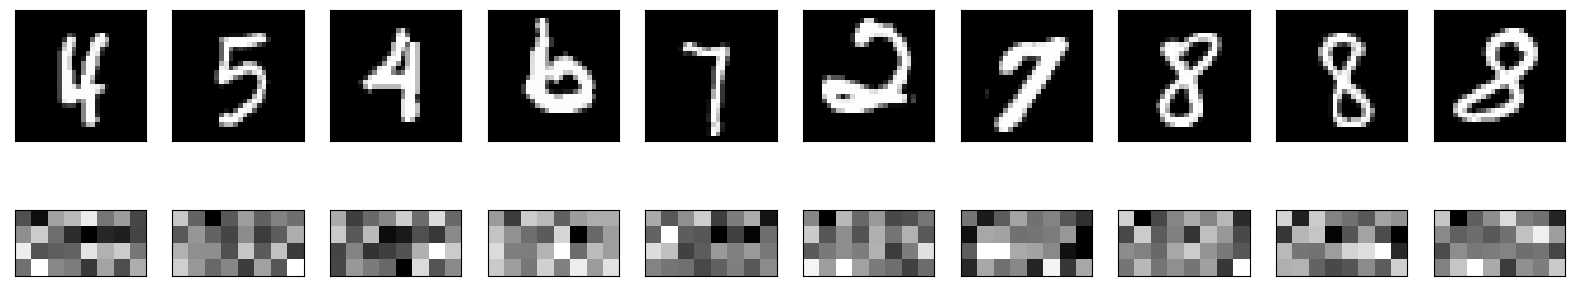

In [34]:
vizualise(x_test,encoded_imgs,sz=(4,8))

**Exercice** : Vérifier que vous obtenez les résultats en décodant les représentations latentes qu'en codant-décodant les données d'entraînement.

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 421us/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 279us/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 945us/step


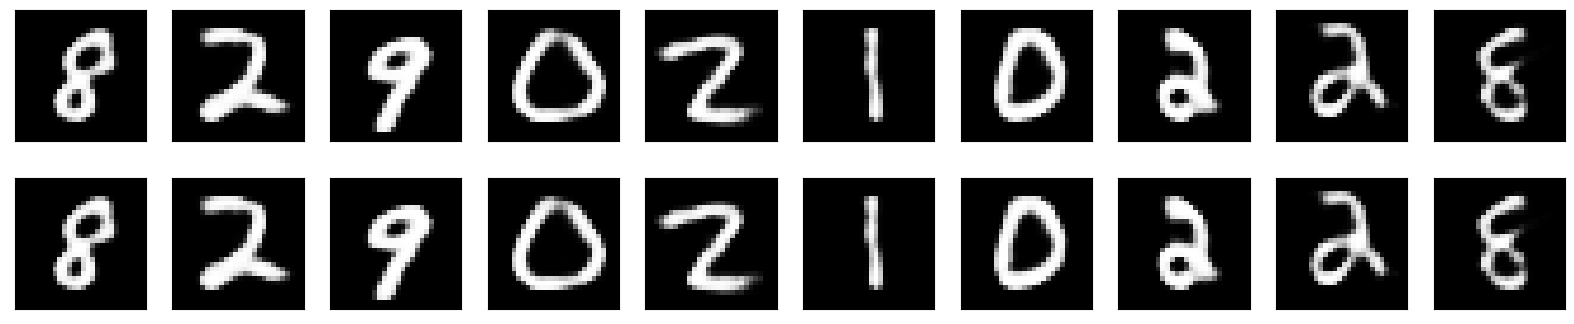

In [35]:
autoencoded_imgs = autoencoder.predict(x_test)

encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

vizualise(autoencoded_imgs,decoded_imgs)

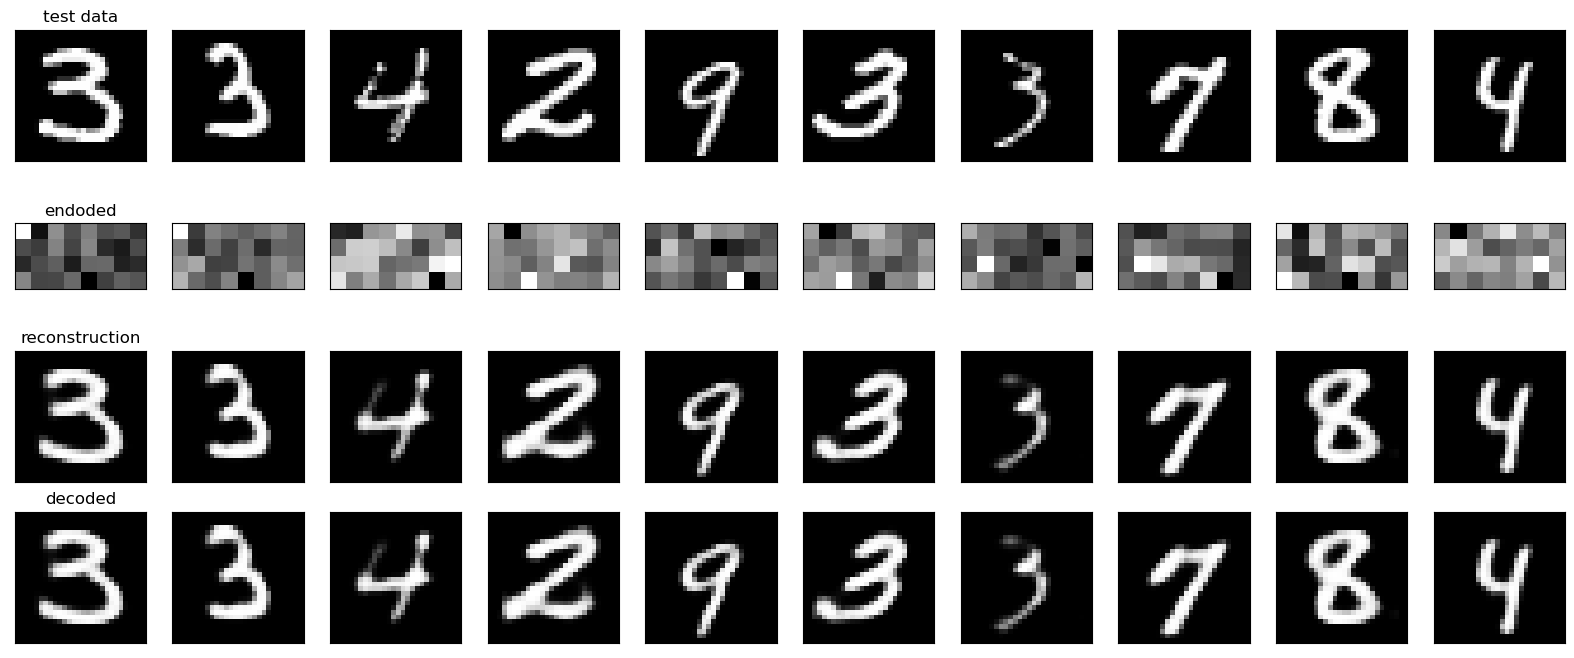

In [36]:
n = 10
idx = [random.randint(0, x_test.shape[0]) for _ in range(0, n)]

plt.figure(figsize=(20, 8))
for i in range(n):
    # display original
    ax = plt.subplot(4, n, i+1)
    plt.imshow(x_test[idx[i]].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # display encoded
    ax = plt.subplot(4, n, i+1 + n)
    plt.imshow(encoded_imgs[idx[i]].reshape(4,8))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction through auto-encoder
    ax = plt.subplot(4, n, i+1 + 2*n)
    plt.imshow(autoencoded_imgs[idx[i]].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # display decoded
    ax = plt.subplot(4, n, i+1 + 3*n)
    plt.imshow(decoded_imgs[idx[i]].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

title = ['test data','endoded','reconstruction','decoded']
for i in range(4) :  
    ax = plt.subplot(4,n,1+i*n)
    plt.title(title[i])

plt.show()

## Influence de la dimension de l'espace latent

Avec la dimension d'espace latent qui vous est fournie, on observe une (relativement) faible erreur de reconstruction. On souhaite étudier l'influence de la dimension de l'espace latent sur l'erreur de reconstruction.

**Exercice** : Tracez une _courbe_ (avec seulement quelques points) qui montre l'évolution de l'erreur de reconstruction en fonction de la dimension de l'espace latent. Quelle est la dimension minimale de l'espace latent qui permet encore d'observer une reconstruction raisonnable des données (avec le réseau qui vous est fourni) ?

Dimension espace latent : 10
Epoch 1/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 0.2774 - val_loss: 0.1440
Epoch 2/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.1418 - val_loss: 0.1329
Epoch 3/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.1331 - val_loss: 0.1279
Epoch 4/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 0.1284 - val_loss: 0.1246
Epoch 5/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 0.1252 - val_loss: 0.1224
Epoch 6/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.1231 - val_loss: 0.1206
Epoch 7/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.1212 - val_loss: 0.1191
Epoch 8/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.1199 - val_loss: 0.1180
Epoch 9/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.1184 - val_loss: 0.1170
Epoch 10/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.1177 - val_loss: 0.1162
Epoch 11/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.1171 - val_loss: 0.1154
Epoch 12/50
469/469 ━━━

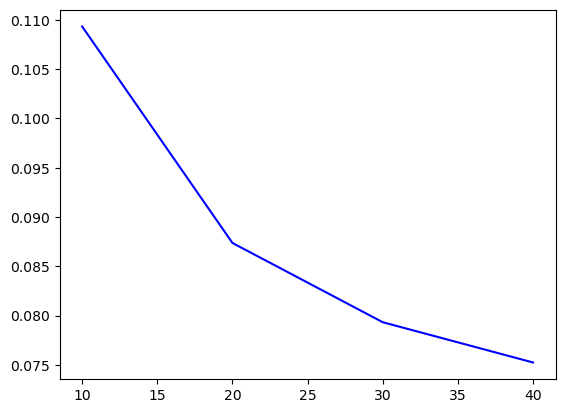

In [39]:
vect_latent = []
vect_reconstruction_loss = []

for n_latent in range(10, 50, 10):
    print("Dimension espace latent : "+str(n_latent))
    autoencoder, encoder, decoder = build_autoencoder(n_latent)
    autoencoder.compile(optimizer='Adam', loss='binary_crossentropy')

    autoencoder.fit(x_train, x_train,
                  epochs=50,
                  batch_size=128,
                  shuffle=True,
                  validation_data=(x_test, x_test))

    loss = autoencoder.evaluate(x_test, x_test)
    vect_latent.append(n_latent)
    vect_reconstruction_loss.append(loss)
    print(" ")

# --- #

plt.plot(vect_latent, vect_reconstruction_loss, 'b')
plt.show()


In [40]:
# %load dim_latent.py

**Exercice (pour aller plus loin)** : Pour diminuer encore plus la dimension de l'espace latent, il est nécessaire d'augmenter la capacité des réseaux encodeur et décodeur. Cherchez à nouveau la dimension minimale de l'espace latent qui permet d'observer une bonne reconstruction des données, mais en augmentant à l'envi la capacité de votre auto-encodeur.

# Auto-encodeurs éparses

In [41]:
from tensorflow.keras import regularizers

Dans l'exemple précédent, l'autoencodeur n'est contraint que par la taille de la couche cachée.

Dans la figure suivante, vous pouvez voir la distribution du nombre de variables latentes fixées à zéro pour les 10.000 images de test.

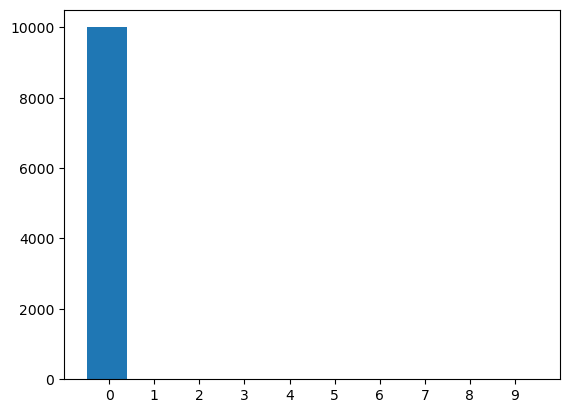

In [42]:
ax = plt.subplot(1,1,1)
plt.hist(np.sum(encoded_imgs==0,axis=1), width=0.9, bins=np.arange(-0.5,10.5,1))
ax.set_xticks(np.arange(10))
plt.show()

Autrement dit, notre espace latent est très plein... On désire obtenir une représentations latente _creuse_. Pour cela, nous allons ajouter à notre auto-encodeur une contrainte de parcimonie.

**Exercice** : En modifiant l'auto-encodeur précédent, réaliser un encodage parcimonieux.

In [47]:
def build_sparse_autoencoder(n_latent=32, l=1e-4):
    # Dimension de l'entrée
    input_img = Input(shape=(n_input,))

    # Définition de l'encoder
    x = Dense(128, activation='relu')(input_img)
    encoded = Dense(n_latent, activation='linear', activity_regularizer = regularizers.l1(l))(x)
    encoder = Model(input_img, encoded, name = "sparse_encoder")

    # Définition du decoder
    decoder_input = Input(shape=(n_latent,))
    x = Dense(128, activation='relu')(decoder_input)
    decoded = Dense(784, activation='sigmoid')(x)
    decoder = Model(decoder_input, decoded, name = "decoder")

    # Construction de l'auto-encodeur
    encoded = encoder(input_img)
    decoded = decoder(encoded)
    autoencoder = Model(input_img, decoded, name = "sparse_autoencoder")

    return autoencoder, encoder, decoder

n_latent = 32
l = 10e-4

sparse_autoencoder, sparse_encoder, sparse_decoder = build_sparse_autoencoder(n_latent, l)

In [48]:
# %load solutions/build_sparse_autoencoder.py

In [49]:
sparse_autoencoder.compile(optimizer='Adam', loss='binary_crossentropy')

sparse_autoencoder.fit(x_train, x_train,
  epochs=50,
  batch_size=256,
  #shuffle=True,
  validation_data=(x_test, x_test))

Epoch 1/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.8180 - val_loss: 0.2708
Epoch 2/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.2686 - val_loss: 0.2653
Epoch 3/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.2650 - val_loss: 0.2640
Epoch 4/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.2639 - val_loss: 0.2642
Epoch 5/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.2642 - val_loss: 0.2639
Epoch 6/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.2638 - val_loss: 0.2637
Epoch 7/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.2637 - val_loss: 0.2638
Epoch 8/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.2636 - val_loss: 0.2638
Epoch 9/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.2636 - val_loss: 0.2638
Epoch 10/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.2636 - val_loss: 0.2639
Epoch 11/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.2639 - val_loss: 0.2638
Epoch 12/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step

**Exercice** : Vérifiez que les images encodées par l'auto-codeur parcimonieux sont effectivement plus creuses que celles obtenues par l'auto-codeur classique.

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 647us/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 768us/step


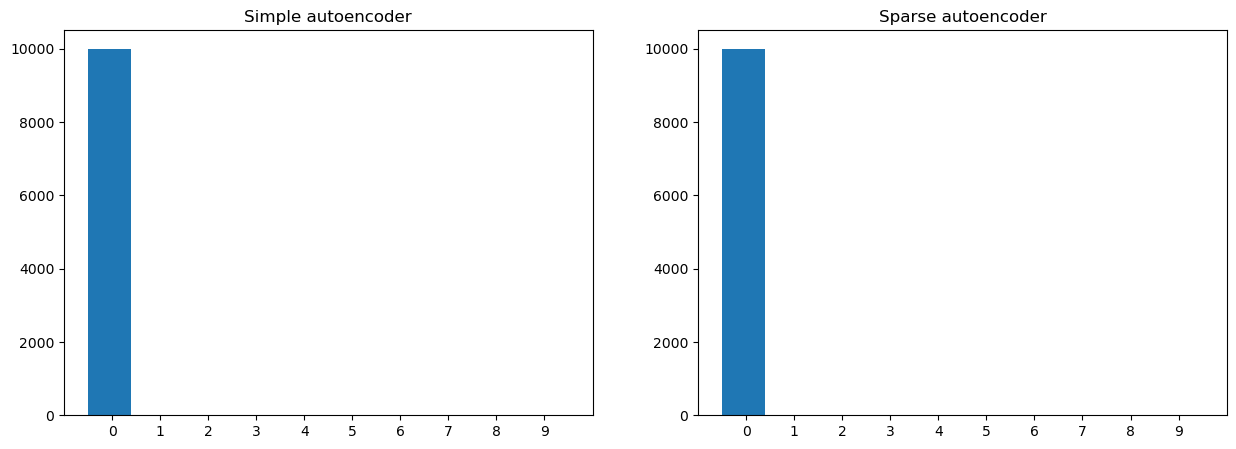

In [51]:
sparse_encoded_imgs = sparse_encoder.predict(x_test)
encoded_imgs = encoder.predict(x_test)

fig = plt.figure(figsize=(15,5))

ax = fig.add_subplot(1,2,1)
ax.hist(np.sum(encoded_imgs==0,axis=1), width=0.9, bins=np.arange(-0.5,10.5,1))
ax.set_xticks(np.arange(10))
ax.set_title("Simple autoencoder")

ax = fig.add_subplot(1,2,2)
ax.hist(np.sum(sparse_encoded_imgs==0,axis=1), width=0.9, bins=np.arange(-0.5,10.5,1))
ax.set_xticks(np.arange(10))
ax.set_title("Sparse autoencoder")

plt.show()

In [50]:
# %load solutions/sparse_autoencoder.py

**Exercice** : Comparez les images reconstruites obtenues par le premier modèle et le modèle parcimonieux.

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 410us/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 702us/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 442us/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 920us/step


ValueError: cannot reshape array of size 40 into shape (4,8)

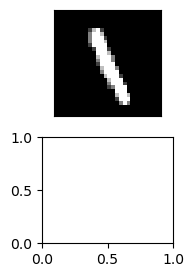

In [53]:
sparse_encoded_imgs = sparse_encoder.predict(x_test)
sparse_decoded_imgs = sparse_decoder.predict(sparse_encoded_imgs)

encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

# --- #

n = 10
idx = [random.randint(0, x_test.shape[0]) for _ in range(0, n)]

plt.figure(figsize=(20, 8))
for i in range(n):
    # display original
    ax = plt.subplot(5, n, i+1)
    plt.imshow(x_test[idx[i]].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # display encoded
    ax = plt.subplot(5, n, i+1 + n)
    plt.imshow(encoded_imgs[idx[i]].reshape(4,8))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # display sparse_encoded
    ax = plt.subplot(5, n, i+1 + 2*n)
    plt.imshow(sparse_encoded_imgs[idx[i]].reshape(4,8))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # display decoded
    ax = plt.subplot(5, n, i+1 + 3*n)
    plt.imshow(decoded_imgs[idx[i]].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # display sparse_decoded
    ax = plt.subplot(5, n, i+1 + 4*n)
    plt.imshow(sparse_decoded_imgs[idx[i]].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

title = ['test data','encoded','sparse encoded','decoded','sparse decoded']
for i in range(5) :  
    ax = plt.subplot(5,n,1+i*n)
    plt.title(title[i])

#plt.tight_layout()
plt.show()

In [52]:
# %load solutions/sparse_autoencoder_compare.py

# Auto-encodeurs convolutionnels

Dans les parties précédentes, nous avons vu des auto-codeurs très simples où les parties encodeur et décodeur sont des perceptrons. Comme vu en cours, ils peuvent tous deux être composés de plus de couches et de différents types de couches.

En particulier, les couches convolutionnelles sont les meilleures couches à utiliser lorsqu'il s'agit d'images.

In [ ]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D

**Exercice** : Implémentez un auto-codeur convolutif avec l'architecture suivante : 

`Encodeur` :
* Une couche de convolution 2D, 16 filtres de taille 3x3
* Une couche de maxpooling 2D avec des filtres de taille 2x2
* Une couche de convolution 2D, 8 filtres de taille 3x3
* Une couche de maxpooling 2D avec des filtres de taille 2x2
* Une couche de convolution 2D, 8 filtres de taille 3x3
* Une couche de maxpooling 2D avec des filtres de taille 2x2

`Décodeur` :
* Une couche de convolution 2D, 8 filtres de taille 3x3
* Une couche de suréchantillonnage (upsampling) 2D avec des filtres de taille 2x2
* Une couche de convolution 2D, 8 filtres de taille 3x3
* Une couche de suréchantillonnage 2D avec des filtres de taille 2x2
* Une couche de convolution 2D, 16 filtres de taille 3x3
* Une couche de suréchantillonnage 2D avec des filtres de taille 2x2
* Une couche de convolution 2D, 1 filtre de taille 3x3, avec activation $\texttt{sigmoid}$.


_Tous les rembourrages (padding) sont des rembourrages $\texttt{same}$ et toutes les fonctions d'activation des couches de convolution, sauf la dernière, sont des $\texttt{reLu}$._

In [ ]:
## A COMPLETER ##

[...]

Vous devez obtenir le summary suivant :

```
Model: "conv_autoencoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
=================================================================
 conv_encoder (Sequential)   (None, 4, 4, 8)           1904      
                                                                 
 conv_decoder (Sequential)   (None, 28, 28, 1)         2481      
                                                                 
=================================================================
Total params: 4,385
Trainable params: 4,385
Non-trainable params: 0
_________________________________________________________________

```

In [ ]:
# %load solutions/build_conv_autoencoder.py

In [ ]:
conv_autoencoder = build_conv_autoencoder()
conv_autoencoder.summary()

In [ ]:
# x_train = np.expand_dims(x_train, axis=-1)
# x_test = np.expand_dims(x_test, axis=-1)

x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

print(x_train.shape)
print(x_test.shape)

In [ ]:
conv_autoencoder.compile(optimizer='Adam', loss='binary_crossentropy')

conv_autoencoder.fit(x_train, x_train,
  epochs=10,
  batch_size=256,
  validation_data=(x_test, x_test))

In [ ]:
conv_autoencoder.evaluate(x_train, x_train)

In [ ]:
conv_decoded_imgs = conv_autoencoder.predict(x_test)
vizualise(x_test,conv_decoded_imgs)

# Application au débruitage

Nous savons maintenant comment construire un auto-encodeur convolutionnel. Nous allons maintenant voir comment il peut être utilisé pour résoudre un problème de débruitage d'image.

Nous créons d'abord de fausses données bruitées à partir des données MNIST.

In [ ]:
# Add random noise
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape) 
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape) 

# Value greater than 1 are set to 1 and value lower than 0 are set to zero
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

Observons le bruit que nous avons créé.

In [ ]:
vizualise(x_test,x_test_noisy)

**Exercice** : En utilisant l'auto-encodeur défini précédemment, réaliser le débruitage de ces images et visualiser l'effet du débruitage.

In [ ]:
## A COMPLETER ##

[...]

In [ ]:
# %load solutions/denoising.py

In [ ]:
# %load solutions/denoising_plot.py

---
# Pour aller plus loin

**Exercice 1** : Écrivez une fonction qui, étant donnés deux données de votre espace de test $I_1$ et $I_2$, réalise l'interpolation (avec, par exemple, 10 étapes) entre la représentation latente ($z_1 = $encoder($I_1$) et $z_2 = $encoder($I_2$)) de ces deux données, et génère les images $I_i$ correspondant aux représentations latentes intermédiaires $z_i$. En pseudo python, cela donne : 

```python
for i in range(10):
    z_i = z1 + i*(z2-z1)/10
    I_i = decoder(z_i)
```
Testez cette fonction avec un auto-encodeur avec une faible erreur de reconstruction, sur deux données présentant le même chiffre écrit différemment, puis deux chiffres différents.

---
**Exercice 2 (Visage)** : Le code fourni dans la suite permet de télécharger et de préparer une [base de données de visages](http://vis-www.cs.umass.edu/lfw/). 

ATTENTION : ici les images sont couleur et comportent 3 canaux (contrairement aux images de MNIST, qui n'en comptent qu'un). 

Par analogie avec l'exercice précédent, on pourrait grâce à la représentation latente apprise par un auto-encodeur, réaliser un morphing entre deux visages. Essayez d'abord d'entraîner un auto-encodeur à obtenir une erreur de reconstruction faible. Qu'observe-t-on ?

In [ ]:
import pandas as pd
import tarfile, tqdm, cv2, os
from sklearn.model_selection import train_test_split
import numpy as np


# Télécharger les données de la base de données "Labelled Faces in the Wild"
!wget http://www.cs.columbia.edu/CAVE/databases/pubfig/download/lfw_attributes.txt
!wget http://vis-www.cs.umass.edu/lfw/lfw-deepfunneled.tgz
!wget http://vis-www.cs.umass.edu/lfw/lfw.tgz
  
ATTRS_NAME = "lfw_attributes.txt"
IMAGES_NAME = "lfw-deepfunneled.tgz"
RAW_IMAGES_NAME = "lfw.tgz"


def decode_image_from_raw_bytes(raw_bytes):
    img = cv2.imdecode(np.asarray(bytearray(raw_bytes), dtype=np.uint8), 1)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    return img


def load_lfw_dataset(use_raw=False,
                     dx=80, dy=80,
                     dimx=45, dimy=45):

    # Read attrs
    df_attrs = pd.read_csv(ATTRS_NAME, sep='\t', skiprows=1)
    df_attrs = pd.DataFrame(df_attrs.iloc[:, :-1].values, columns=df_attrs.columns[1:])
    imgs_with_attrs = set(map(tuple, df_attrs[["person", "imagenum"]].values))

    # Read photos
    all_photos = []
    photo_ids = []

    # tqdm in used to show progress bar while reading the data in a notebook here, you can change
    # tqdm_notebook to use it outside a notebook
    with tarfile.open(RAW_IMAGES_NAME if use_raw else IMAGES_NAME) as f:
        for m in tqdm.tqdm_notebook(f.getmembers()):
            # Only process image files from the compressed data
            if m.isfile() and m.name.endswith(".jpg"):
                # Prepare image
                img = decode_image_from_raw_bytes(f.extractfile(m).read())

                # Crop only faces and resize it
                img = img[dy:-dy, dx:-dx]
                img = cv2.resize(img, (dimx, dimy))

                # Parse person and append it to the collected data
                fname = os.path.split(m.name)[-1]
                fname_splitted = fname[:-4].replace('_', ' ').split()
                person_id = ' '.join(fname_splitted[:-1])
                photo_number = int(fname_splitted[-1])
                if (person_id, photo_number) in imgs_with_attrs:
                    all_photos.append(img)
                    photo_ids.append({'person': person_id, 'imagenum': photo_number})

    photo_ids = pd.DataFrame(photo_ids)
    all_photos = np.stack(all_photos).astype('uint8')

    # Preserve photo_ids order!
    all_attrs = photo_ids.merge(df_attrs, on=('person', 'imagenum')).drop(["person", "imagenum"], axis=1)

    return all_photos, all_attrs


# Prépare le dataset et le charge dans la variable X
X, attr = load_lfw_dataset(use_raw=True, dimx=32, dimy=32)

# Normalise les images
X = X/255

# Sépare les images en données d'entraînement et de test
X_train, X_test = train_test_split(X, test_size=0.1, random_state=42)